In [92]:
import pandas as pd
import numpy as np
import scipy.optimize as solver
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as fig

df = pd.read_excel('rr.xlsx')

print(df)
list=['EURO','LIBRA','DOLLAR']

           Data    EURO   LIBRA  DOLLAR
0    2014-12-01  3.1923  4.0268  2.5600
1    2014-12-02  3.1802  4.0156  2.5682
2    2014-12-03  3.1424  4.0038  2.5525
3    2014-12-04  3.2080  4.0616  2.5915
4    2014-12-05  3.1813  4.0354  2.5895
...         ...     ...     ...     ...
1842 2021-12-22  6.4026  7.5470  5.6540
1843 2021-12-23  6.4285  7.6089  5.6749
1844 2021-12-24  6.4224  7.5960  5.6753
1845 2021-12-27  6.3708  7.5599  5.6249
1846 2021-12-28  6.3650  7.5611  5.6283

[1847 rows x 4 columns]


In [106]:
x=df['Data']
y1=df['EURO']
y2=df['LIBRA']
y3=df['DOLLAR']

fig = make_subplots()
fig.add_trace(go.Scatter(x=x, y=y1, name='EURO'))
fig.add_trace(go.Scatter(x=x, y=y2, name='LIBRA'))
fig.add_trace(go.Scatter(x=x, y=y3, name='DOLLAR'))
fig.update_layout(
    title_text='CARTEIRA — MOEDAS'
)

fig.update_xaxes(title_text="DATA")
fig.update_yaxes(title_text="<b>VALOR</b>EM REAIS")

In [94]:
prec=df.drop(['Data'],axis=1)
ri=prec/prec.shift(1)-1
mi=ri.mean().values*252
sigma=ri.cov()*252

print(' ')
print(' ')
print('MATRIZ DE COVARIÂNCIA DA CARTEIRA')
print(sigma)

 
 
MATRIZ DE COVARIÂNCIA DA CARTEIRA
            EURO     LIBRA    DOLLAR
EURO    0.029496  0.026893  0.026272
LIBRA   0.026893  0.031246  0.025764
DOLLAR  0.026272  0.025764  0.029077


In [95]:

n=len(list)

In [96]:
vet_R=[]
vet_Vol=[]
for i in range(2000):
    w=np.random.random(n)
    w=w/np.sum(w)
    retorno=np.sum(w*mi)
    risco=np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    vet_R.append(retorno)
    vet_Vol.append(risco)

In [97]:
fig.plot(vet_Vol,vet_R,'ok')
fig.style.use('ggplot')
fig.grid()
fig.xlabel('VOLATILIDADE ESPERADA')
fig.ylabel('RETORNO ESPERADO')

AttributeError: 'Figure' object has no attribute 'plot'

In [ ]:
print(vet_R)
print(vet_Vol)
print(w)
print(risco)
print(retorno)

[0.11175525845276067]
[0.16568993576952168]
[0.36870224 0.25902085 0.37227691]
0.16568993576952168
0.11175525845276067


In [104]:
fig2 = px.scatter(x=vet_Vol,y=vet_R,color=vet_R)

fig2.update_layout(
    title_text='VOLATILIDADE ESPERADA x RETORNO ESPERADO — MOEDAS'
)

fig2.update_xaxes(title_text="<b>VOLATILIDADE</b>ESPERADA")
fig2.update_yaxes(title_text="<b>RETORNO</b>ESPERADO")
fig2.show()

In [88]:
def f_obj(peso):
    return np.sqrt(np.dot(peso.T,np.dot(sigma,peso)))

x0=np.array([1.0/(len(list)) for x  in range(len(list))])
bounds = tuple((0,1) for x in range (len(list)))

faixa_ret=np.arange(0.06,0.085, .001)
risk=[]

In [89]:
for i in faixa_ret:
    constraints=[{'type':'eq','fun':lambda x: np.sum(x) - 1},{'type':'eq','fun':lambda x: np.sum(x*mi) - i}]
    outcome=solver.minimize(f_obj,x0,constraints=constraints,bounds=bounds,method='SLSQP')
    risk.append(outcome.fun)

PESOS ÓTIMOS (w)=  [0. 1. 0.]


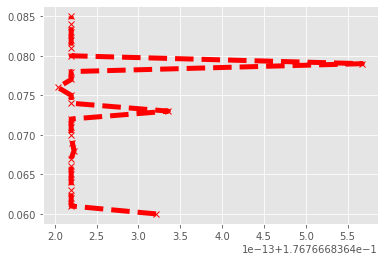

In [90]:
fig.plot(risk,faixa_ret,'r--x',linewidth=5)
print('PESOS ÓTIMOS (w)= ',outcome['x'].round(3))